In [136]:
#!pip install pyyaml


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,precision_recall_curve, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

In [4]:
pd.options.display.max_columns

20

In [5]:
df= pd.read_csv('../data/processed/df_genus_encoded.csv')
df.shape

(12000, 28)

In [6]:
df.head()

,Genus_&_Specie,genero_etiqueta,Time,Location_encoded,Zone_encoded,Habitat_encoded,Cranial_Capacity,Height,Incisor_Size_encoded,Jaw_Shape_encoded,...,Biped_encoded,foots_encoded,arms_encoded,Diet_encoded,Sexual_Dimorphism_encoded,Hip_encoded,Vertical_Front_encoded,Anatomy_encoded,Migrated_encoded,genero_especie_num
0,hominino Orrorin tugenencin,Homininos,6.041124,0,1,1,144.51410,110.24323,2,4,...,0,0,0,4,0,1,0,0,0,1
1,hominino Ardipithecus ramidus / kabadda,Homininos,4.383910,0,1,2,293.96021,107.69018,2,4,...,1,0,0,2,1,1,0,0,0,2
2,Australopithecus Afarensis,Australopithecus,3.749413,0,1,2,264.79849,123.76644,4,3,...,2,1,0,4,0,0,0,0,0,5
3,Australopithecus Anamensis,Australopithecus,4.595606,0,1,1,403.28047,111.40831,4,3,...,2,0,0,4,0,1,0,1,0,4
4,Australopithecus Africanus,Australopithecus,3.614060,0,2,1,679.15233,111.59004,2,4,...,2,0,0,4,0,1,1,0,0,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Genus_&_Specie              12000 non-null  object 
 1   genero_etiqueta             12000 non-null  object 
 2   Time                        12000 non-null  float64
 3   Location_encoded            12000 non-null  int64  
 4   Zone_encoded                12000 non-null  int64  
 5   Habitat_encoded             12000 non-null  int64  
 6   Cranial_Capacity            12000 non-null  float64
 7   Height                      12000 non-null  float64
 8   Incisor_Size_encoded        12000 non-null  int64  
 9   Jaw_Shape_encoded           12000 non-null  int64  
 10  Torus_Supraorbital_encoded  12000 non-null  int64  
 11  Prognathism_encoded         12000 non-null  int64  
 12  Foramen_encoded             12000 non-null  int64  
 13  Canine_Size_encoded         120

<Axes: >

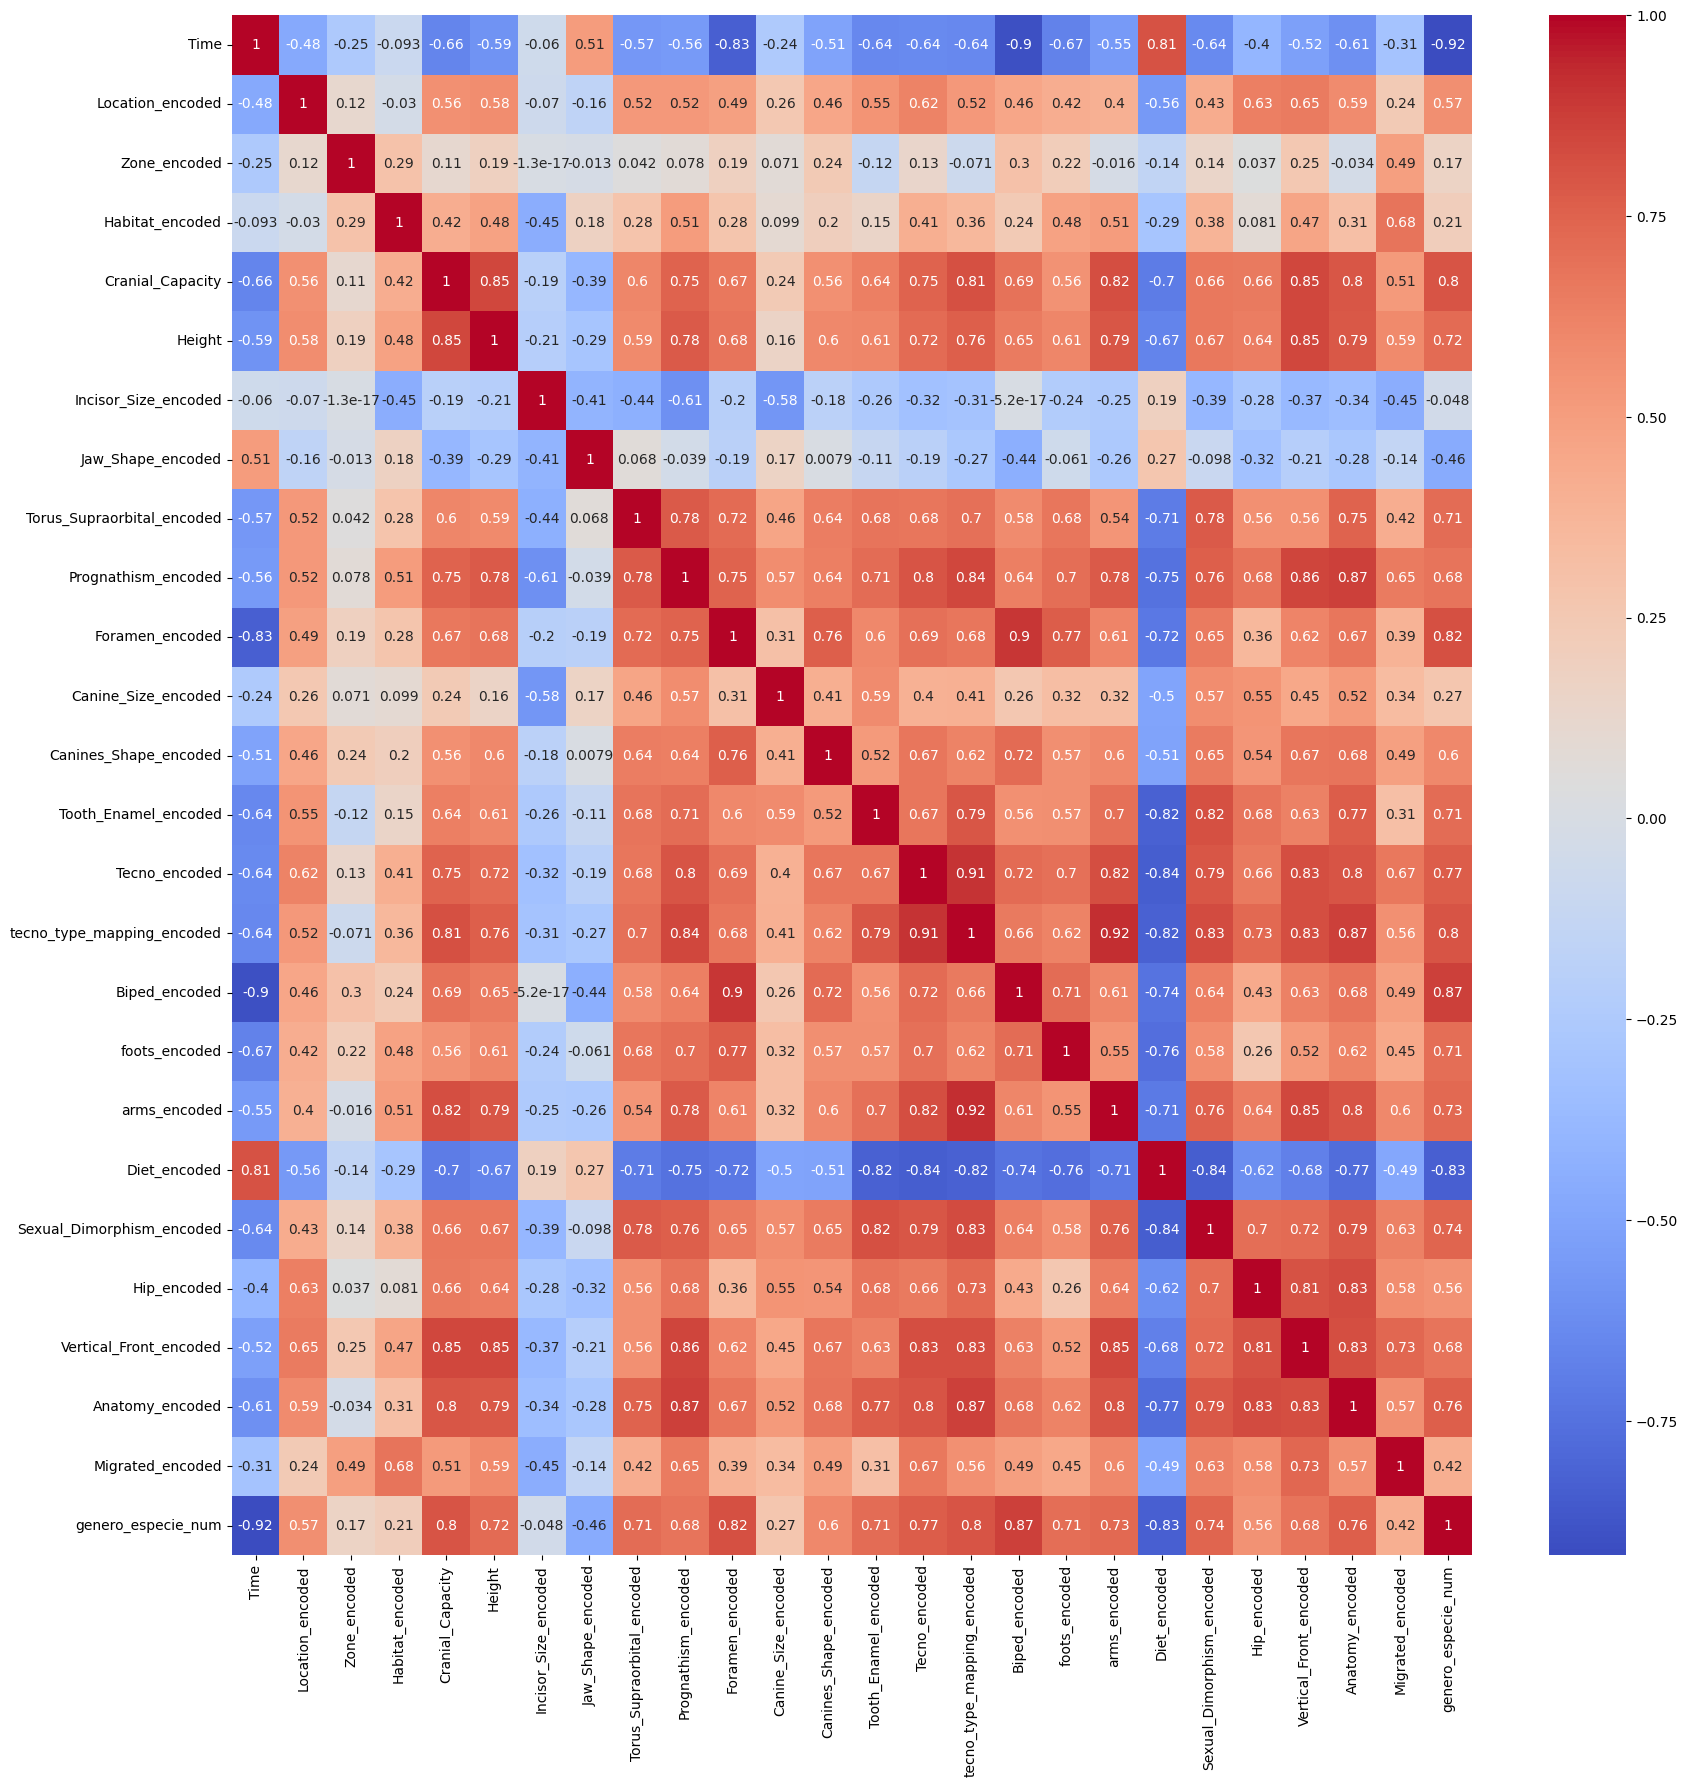

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [9]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(train_df.shape)
print(test_df.shape)

train_df.to_csv('../data/train/train2.csv', index=False)
test_df.to_csv('../data/test/test2.csv', index=False)

(9600, 28)
(2400, 28)


In [10]:
df_train= pd.read_csv('../data/train/train2.csv')
df_test= pd.read_csv('../data/test/test2.csv')

In [11]:
df_train.head()

,Genus_&_Specie,genero_etiqueta,Time,Location_encoded,Zone_encoded,Habitat_encoded,Cranial_Capacity,Height,Incisor_Size_encoded,Jaw_Shape_encoded,...,Biped_encoded,foots_encoded,arms_encoded,Diet_encoded,Sexual_Dimorphism_encoded,Hip_encoded,Vertical_Front_encoded,Anatomy_encoded,Migrated_encoded,genero_especie_num
0,Homo Erectus,Homo temprano,1.576796,1,3,3,1024.94102,158.95309,1,2,...,3,1,1,1,1,2,2,2,1,17
1,Australopithecus Afarensis,Australopithecus,3.838121,0,1,2,477.83768,134.88884,4,3,...,2,1,0,4,0,0,0,0,0,5
2,Homo Erectus,Homo temprano,1.719525,1,3,3,1011.64225,150.41809,1,2,...,3,1,1,1,1,2,2,2,1,17
3,Homo Floresiensis,Otros,0.910479,1,1,0,219.17185,99.97738,2,3,...,3,1,0,1,1,1,0,1,0,19
4,Homo Antecesor,Homo temprano,0.791006,2,3,3,939.82732,171.96014,3,3,...,3,1,1,1,1,2,2,1,1,20


In [12]:
df_train.columns

Index(['Genus_&_Specie', 'genero_etiqueta', 'Time', 'Location_encoded',
       'Zone_encoded', 'Habitat_encoded', 'Cranial_Capacity', 'Height',
       'Incisor_Size_encoded', 'Jaw_Shape_encoded',
       'Torus_Supraorbital_encoded', 'Prognathism_encoded', 'Foramen_encoded',
       'Canine_Size_encoded', 'Canines_Shape_encoded', 'Tooth_Enamel_encoded',
       'Tecno_encoded', 'tecno_type_mapping_encoded', 'Biped_encoded',
       'foots_encoded', 'arms_encoded', 'Diet_encoded',
       'Sexual_Dimorphism_encoded', 'Hip_encoded', 'Vertical_Front_encoded',
       'Anatomy_encoded', 'Migrated_encoded', 'genero_especie_num'],
      dtype='object')

In [13]:
X=df_train[['Time', 'Location_encoded',
       'Zone_encoded', 'Habitat_encoded','Cranial_Capacity','Height', 'Incisor_Size_encoded',
       'Jaw_Shape_encoded', 'Torus_Supraorbital_encoded',
       'Prognathism_encoded', 'Foramen_encoded', 'Canine_Size_encoded',
       'Canines_Shape_encoded', 'Tooth_Enamel_encoded', 'Tecno_encoded',
       'tecno_type_mapping_encoded', 'Biped_encoded', 'foots_encoded','arms_encoded',
       'Diet_encoded', 'Sexual_Dimorphism_encoded', 'Hip_encoded',
       'Vertical_Front_encoded', 'Anatomy_encoded', 'Migrated_encoded']]
y= df_train['genero_especie_num']
print(X.shape)
print(y.shape)

(9600, 25)
(9600,)


In [14]:
X1=df_test[['Time', 'Location_encoded',
       'Zone_encoded', 'Habitat_encoded','Cranial_Capacity','Height', 'Incisor_Size_encoded',
       'Jaw_Shape_encoded', 'Torus_Supraorbital_encoded',
       'Prognathism_encoded', 'Foramen_encoded', 'Canine_Size_encoded',
       'Canines_Shape_encoded', 'Tooth_Enamel_encoded', 'Tecno_encoded',
       'tecno_type_mapping_encoded', 'Biped_encoded', 'foots_encoded','arms_encoded',
       'Diet_encoded', 'Sexual_Dimorphism_encoded', 'Hip_encoded',
       'Vertical_Front_encoded', 'Anatomy_encoded', 'Migrated_encoded']]
y1= df_test['genero_especie_num']

In [15]:
len(X1.columns)

25

#### Esto lo he hecho para las etiquetas de la matriz de confusion

In [16]:
nombres_hominidos = {
    'hominino Orrorin tugenencin': 0,
    'hominino Sahelanthropus tchadensis': 1,
    'hominino Ardipithecus ramidus / kabadda': 2,
    'Ardipithecus Ramidus / Kadabba': 3,
    'Australopithecus Anamensis': 4,
    'Australopithecus Afarensis': 5,
    'Australopithecus Bahrelghazali': 6,
    'Australopithecus Africanus': 7,
    'Australopithecus Garhi': 8,
    'Australopithecus Sediba': 9,
    'Paranthropus Aethiopicus': 10,
    'Paranthropus Robustus': 11,
    'Paranthropus Boisei': 12,
    'Homo Habilis': 13,
    'Homo Rudolfensis': 14,
    'Homo Georgicus': 15,
    'Homo Ergaster': 16,
    'Homo Erectus': 17,
    'Homo Naledi': 18,
    'Homo Floresiensis': 19,
    'Homo Antecesor': 20,
    'Homo Heidelbergensis': 21,
    'Homo Rodhesiensis': 22,
    'Homo Neanderthalensis\n': 23,
    'Homo Sapiens': 24   
}

lista_nombres_hominidos = list(nombres_hominidos.keys())
lista_nombres_hominidos

['hominino Orrorin tugenencin',
 'hominino Sahelanthropus tchadensis',
 'hominino Ardipithecus ramidus / kabadda',
 'Ardipithecus Ramidus / Kadabba',
 'Australopithecus Anamensis',
 'Australopithecus Afarensis',
 'Australopithecus Bahrelghazali',
 'Australopithecus Africanus',
 'Australopithecus Garhi',
 'Australopithecus Sediba',
 'Paranthropus Aethiopicus',
 'Paranthropus Robustus',
 'Paranthropus Boisei',
 'Homo Habilis',
 'Homo Rudolfensis',
 'Homo Georgicus',
 'Homo Ergaster',
 'Homo Erectus',
 'Homo Naledi',
 'Homo Floresiensis',
 'Homo Antecesor',
 'Homo Heidelbergensis',
 'Homo Rodhesiensis',
 'Homo Neanderthalensis\n',
 'Homo Sapiens']

## PRIMER MODELO DE RANDOM FOREST CON PCA Y SCALER

In [82]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
]

pipeline = Pipeline(steps)

param_dist = {
    'pca__n_components': [24,25],
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [2,3,4],
    'classifier__max_leaf_nodes': [9,10,11,16]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=5, n_iter=10,n_jobs=-1, random_state=42,verbose= 2)


rs=random_search.fit(X, y)

best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 1.0
Best Parameters: {'pca__n_components': 25, 'classifier__n_estimators': 500, 'classifier__max_leaf_nodes': 10, 'classifier__max_depth': 3}


In [83]:
be=rs.best_estimator_.fit(X,y)

In [84]:
y_pred_rf_pca_test1=be.predict(X1)
y_pred_rf_pca_test1_pproba = be.predict_proba(X1)

In [85]:
y_pred_rf_pca_test1

array([6, 4, 7, ..., 2, 4, 1], dtype=int64)

In [86]:
precision1 = precision_score(y1, y_pred_rf_pca_test1,average='weighted')
recall1 = recall_score(y1, y_pred_rf_pca_test1,average='weighted')
f11 = f1_score(y1, y_pred_rf_pca_test1,average='weighted')
accuracy1=accuracy_score(y1,y_pred_rf_pca_test1)
roc_auc1= roc_auc_score(y1,y_pred_rf_pca_test1_pproba,average='weighted',multi_class='ovo')
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f11)
print('ROC AUC score:', roc_auc1)

print('Accuracy',accuracy1)

Precision: 0.999588122605364
Recall: 0.9995833333333334
F1-score: 0.9995835213120917
ROC AUC score: 1.0
Accuracy 0.9995833333333334


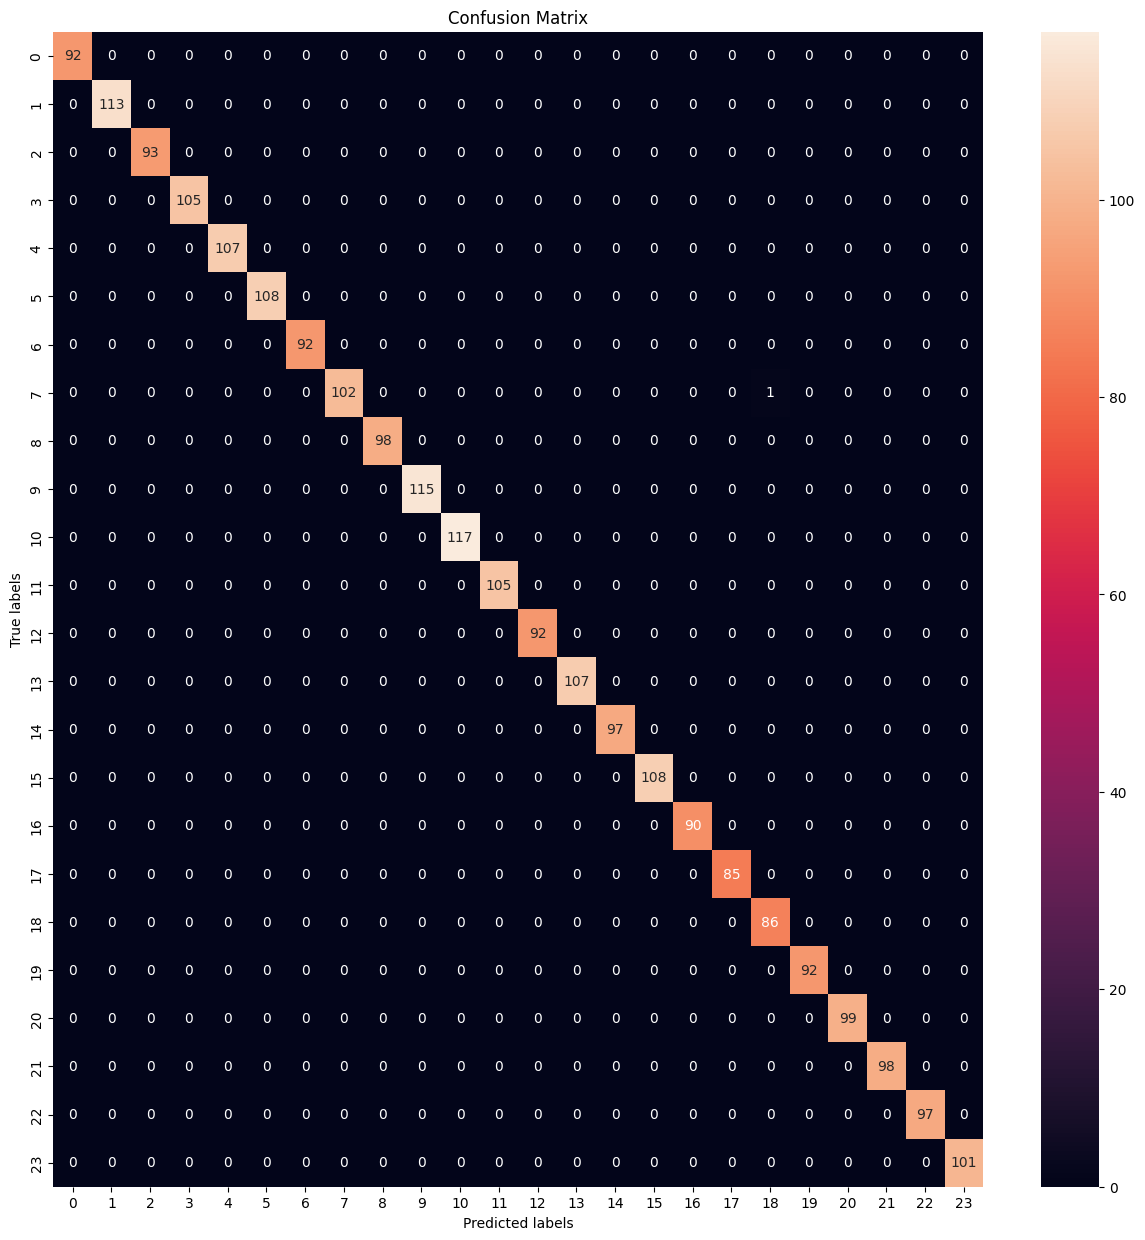

In [87]:

plt.figure(figsize=(15,15))
c_matrix = confusion_matrix(y1,y_pred_rf_pca_test1)
#print(c_matrix)
sns.heatmap(c_matrix, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

In [88]:
import pickle

filename = '../models/rf1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be, archivo_salida)

In [58]:
with open(filename, 'rb') as archivo_entrada:
    rf1 = pickle.load(archivo_entrada)

## SEGUNDO MODELO DE RANDOM FOREST CON SCALER Y PCA ------- MODELO FINAL

In [27]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
]

pipeline = Pipeline(steps)

param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [25],
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [3,5],
    'classifier__max_leaf_nodes': [16,17,18]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=5, n_iter=10,n_jobs=-1, random_state=42,verbose= 2)


rs=random_search.fit(X, y)


best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 1.0
Best Parameters: {'scaler': StandardScaler(), 'pca__n_components': 25, 'classifier__n_estimators': 500, 'classifier__max_leaf_nodes': 18, 'classifier__max_depth': 5}


In [28]:
be1=rs.best_estimator_.fit(X,y)

In [29]:
importances = be1.named_steps['classifier'].feature_importances_
importances

array([0.06915886, 0.08018389, 0.09934443, 0.07335268, 0.09398889,
       0.06435491, 0.09010304, 0.07357873, 0.08036174, 0.06412063,
       0.04119521, 0.00391766, 0.04454661, 0.06138979, 0.01560287,
       0.01557379, 0.00603629, 0.00066846, 0.00047162, 0.00144586,
       0.00152329, 0.        , 0.00101456, 0.00838884, 0.00967737])

In [30]:
#Test
y_pred_rf_pca_test1_2=be1.predict(X1)
y_pred_rf_pca_test1_pproba_2 = be1.predict_proba(X1)
#Train
y_pred_rf_pca_train1_2=be1.predict(X)
y_pred_rf_pca_train1_pproba_2 = be1.predict_proba(X)

In [31]:
precision2 = precision_score(y1, y_pred_rf_pca_test1_2,average='weighted')
recall2 = recall_score(y1, y_pred_rf_pca_test1_2,average='weighted')
f12 = f1_score(y1, y_pred_rf_pca_test1_2,average='weighted')
accuracy2=accuracy_score(y1,y_pred_rf_pca_test1_2)
roc_auc_2= roc_auc_score(y,y_pred_rf_pca_train1_pproba_2,average='weighted',multi_class='ovo')

precision_train2 = precision_score(y, y_pred_rf_pca_train1_2,average='weighted')
recall_train2 = recall_score(y, y_pred_rf_pca_train1_2,average='weighted')
f1_train2 = f1_score(y, y_pred_rf_pca_train1_2,average='weighted')
accuracy_train2=accuracy_score(y,y_pred_rf_pca_train1_2)
roc_auc_train2= roc_auc_score(y,y_pred_rf_pca_train1_pproba_2,average='weighted',multi_class='ovo')
print('TEST')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)
print('ROC AUC score:', roc_auc_train2)
print('Accuracy',accuracy2)
print('-'*200)
print('TRAIN')
print("Precision:", precision_train2)
print("Recall:", recall_train2)
print("F1-score:", f1_train2)
print('ROC AUC score:', roc_auc_train2)
print('Accuracy',accuracy_train2)


TEST
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC score: 1.0
Accuracy 1.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
TRAIN
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC score: 1.0
Accuracy 1.0


In [44]:
report = classification_report(y1, y_pred_rf_pca_test1_2)

# Imprimir el informe de clasificación
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       113
           2       1.00      1.00      1.00        93
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00       107
           6       1.00      1.00      1.00       108
           7       1.00      1.00      1.00        92
           8       1.00      1.00      1.00       103
           9       1.00      1.00      1.00        98
          10       1.00      1.00      1.00       115
          11       1.00      1.00      1.00       117
          12       1.00      1.00      1.00       105
          13       1.00      1.00      1.00        92
          14       1.00      1.00      1.00       107
          15       1.00      1.00      1.00        97
          16       1.00      1.00      1.00       108
          17       1.00      1.00      1.00        90
          18       1.00    

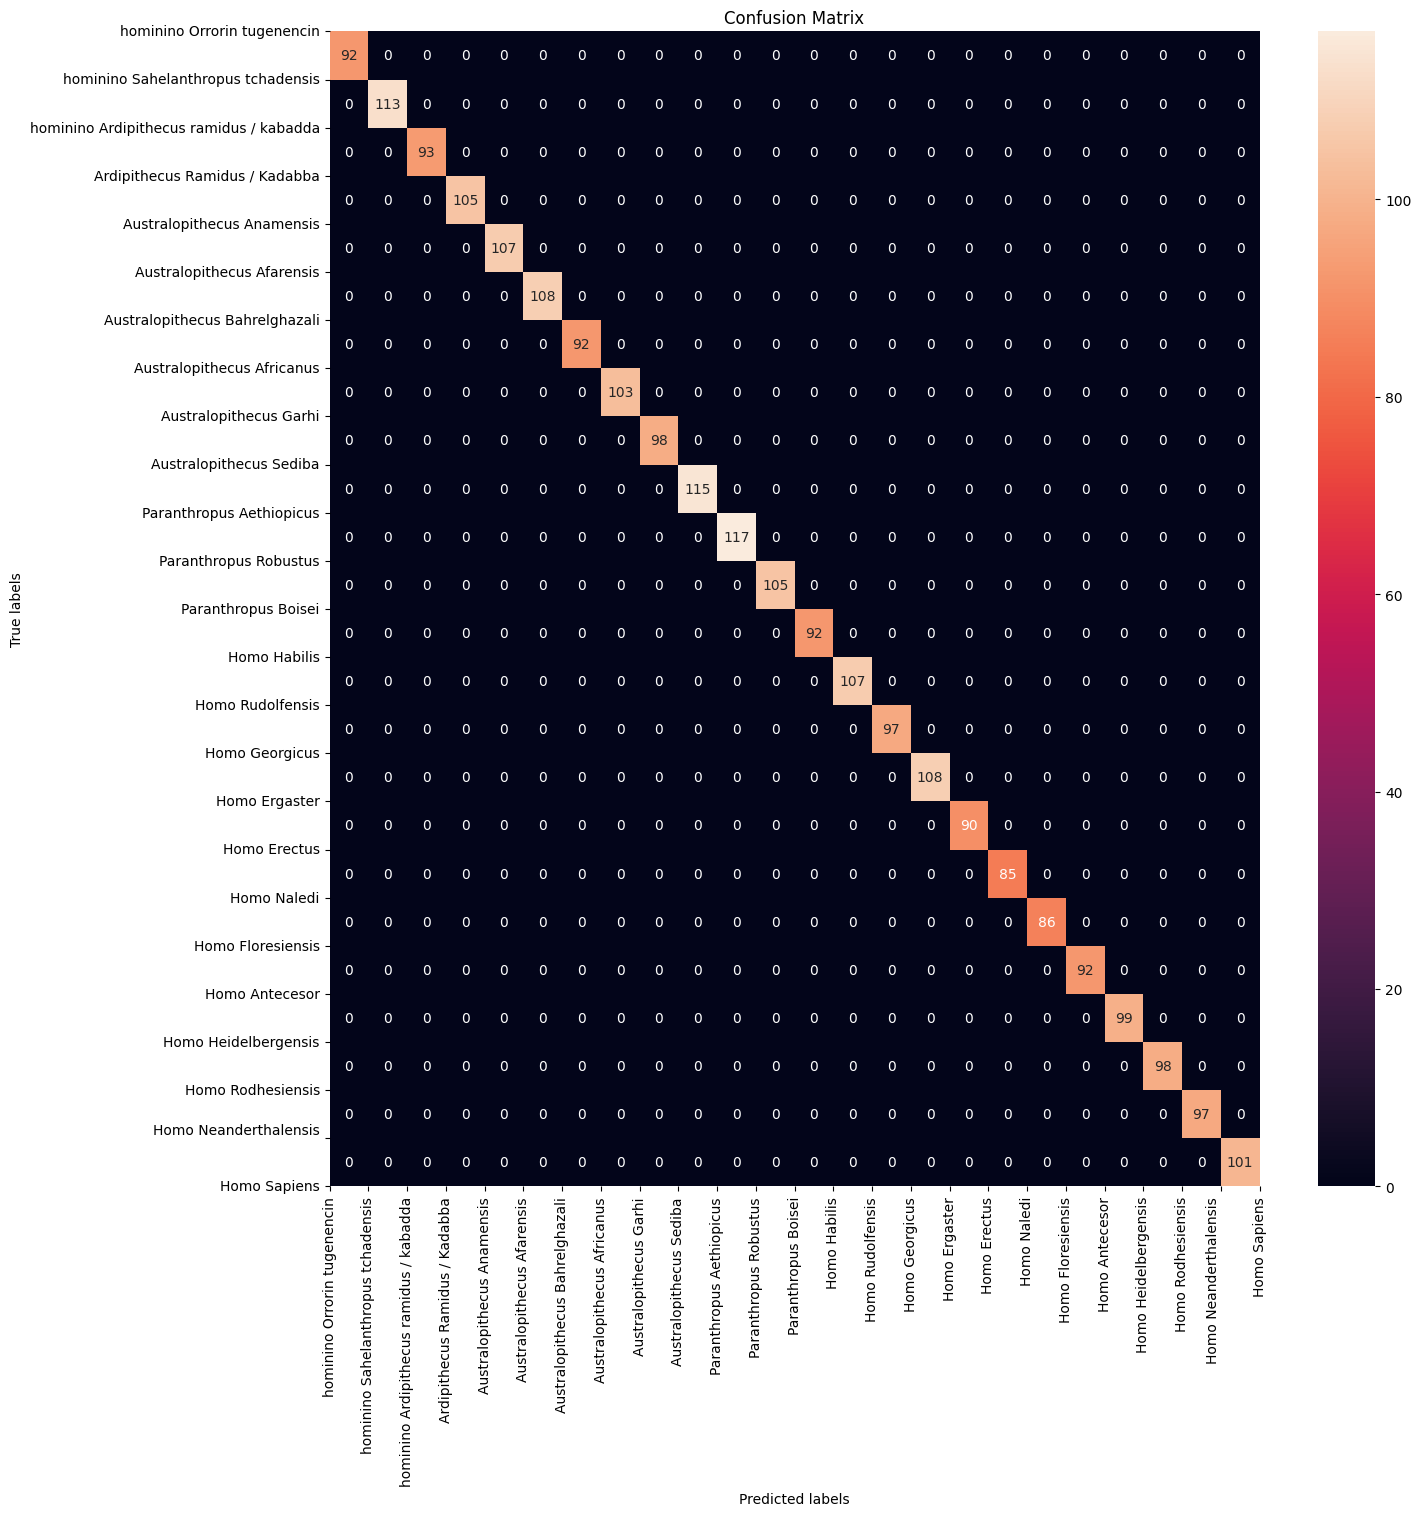

In [32]:
plt.figure(figsize=(15,15))
c_matrix1 = confusion_matrix(y1,y_pred_rf_pca_test1_2)
sns.heatmap(c_matrix1, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(rotation=90)
plt.xticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.yticks(rotation=360)
plt.yticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.title('Confusion Matrix')
plt.show();

In [33]:
X.columns

Index(['Time', 'Location_encoded', 'Zone_encoded', 'Habitat_encoded',
       'Cranial_Capacity', 'Height', 'Incisor_Size_encoded',
       'Jaw_Shape_encoded', 'Torus_Supraorbital_encoded',
       'Prognathism_encoded', 'Foramen_encoded', 'Canine_Size_encoded',
       'Canines_Shape_encoded', 'Tooth_Enamel_encoded', 'Tecno_encoded',
       'tecno_type_mapping_encoded', 'Biped_encoded', 'foots_encoded',
       'arms_encoded', 'Diet_encoded', 'Sexual_Dimorphism_encoded',
       'Hip_encoded', 'Vertical_Front_encoded', 'Anatomy_encoded',
       'Migrated_encoded'],
      dtype='object')

In [34]:
pca_features = pipeline.named_steps['pca'].fit_transform(X)

In [35]:
print("Dimensiones de importances:", importances.shape)
print("Dimensiones de X.columns:", X.columns.shape)

Dimensiones de importances: (25,)
Dimensiones de X.columns: (25,)


In [36]:
df_combined = pd.DataFrame(data=importances, columns=['Feature_Importance'], index=X.columns)
df_combined['PC'] = [f'PC{i+1}' for i in range(pca_features.shape[1])]

In [37]:
df_combined= df_combined.sort_values(by='Feature_Importance',ascending=False)

In [40]:
df_combined.to_csv('../data/processed/df_feature_importances.csv',index_label='Feature_Name')

In [39]:
import pickle

filename = '../models/rf2_final.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be1, archivo_salida)

In [41]:
with open(filename, 'rb') as archivo_entrada:
    rf2_final = pickle.load(archivo_entrada)

## TERCER MODELO DE RANDOM FOREST PARA INTENTAR MEJORAR EL RECALL

In [189]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
]

pipeline = Pipeline(steps)

param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [23,24,25],
    'classifier__n_estimators': [100,500,1000],
    'classifier__max_depth': [5,6,7],
    'classifier__max_leaf_nodes': [17,18,19]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=5, n_iter=20,n_jobs=-1, random_state=42,verbose= 2)


rs=random_search.fit(X, y)

best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Score: 1.0
Best Parameters: {'scaler': MinMaxScaler(), 'pca__n_components': 10, 'classifier__n_estimators': 500, 'classifier__max_leaf_nodes': 19, 'classifier__max_depth': 6}


In [190]:
be_rf_2=rs.best_estimator_.fit(X,y)

In [191]:
y_pred_rf_pca_test1_3=be_rf_2.predict(X1)
y_pred_rf_pca_test1_pproba_3 = be_rf_2.predict_proba(X1)

y_pred_rf_pca_train1_3=be_rf_2.predict(X)
y_pred_rf_pca_train1_pproba_3 = be_rf_2.predict_proba(X)

In [192]:
precision7 = precision_score(y1, y_pred_rf_pca_test1_3,average='weighted')
recall7 = recall_score(y1, y_pred_rf_pca_test1_3,average='weighted')
f17 = f1_score(y1, y_pred_rf_pca_test1_3,average='weighted')
accuracy7=accuracy_score(y1,y_pred_rf_pca_test1_3)

precision_train7 = precision_score(y, y_pred_rf_pca_train1_3,average='weighted')
recall_train7 = recall_score(y, y_pred_rf_pca_train1_3,average='weighted')
f1_train7 = f1_score(y, y_pred_rf_pca_train1_3,average='weighted')
accuracy_train7=accuracy_score(y,y_pred_rf_pca_train1_3)
roc_auc_train7= roc_auc_score(y,y_pred_rf_pca_train1_pproba_3,average='weighted',multi_class='ovo')

roc_auc7= roc_auc_score(y1,y_pred_rf_pca_test1_pproba_3,average='weighted',multi_class='ovo')
print('TEST')
print("Precision:", precision7)
print("Recall:", recall7)
print("F1-score:", f17)
print('ROC AUC score:', roc_auc7)
print('Accuracy',accuracy7)
print('-'*200)
print('TRAIN')
print("Precision:", precision_train7)
print("Recall:", recall_train7)
print("F1-score:", f1_train7)
print('ROC AUC score:', roc_auc_train7)
print('Accuracy',accuracy_train7)

TEST
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC score: 1.0
Accuracy 1.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
TRAIN
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC score: 1.0
Accuracy 1.0


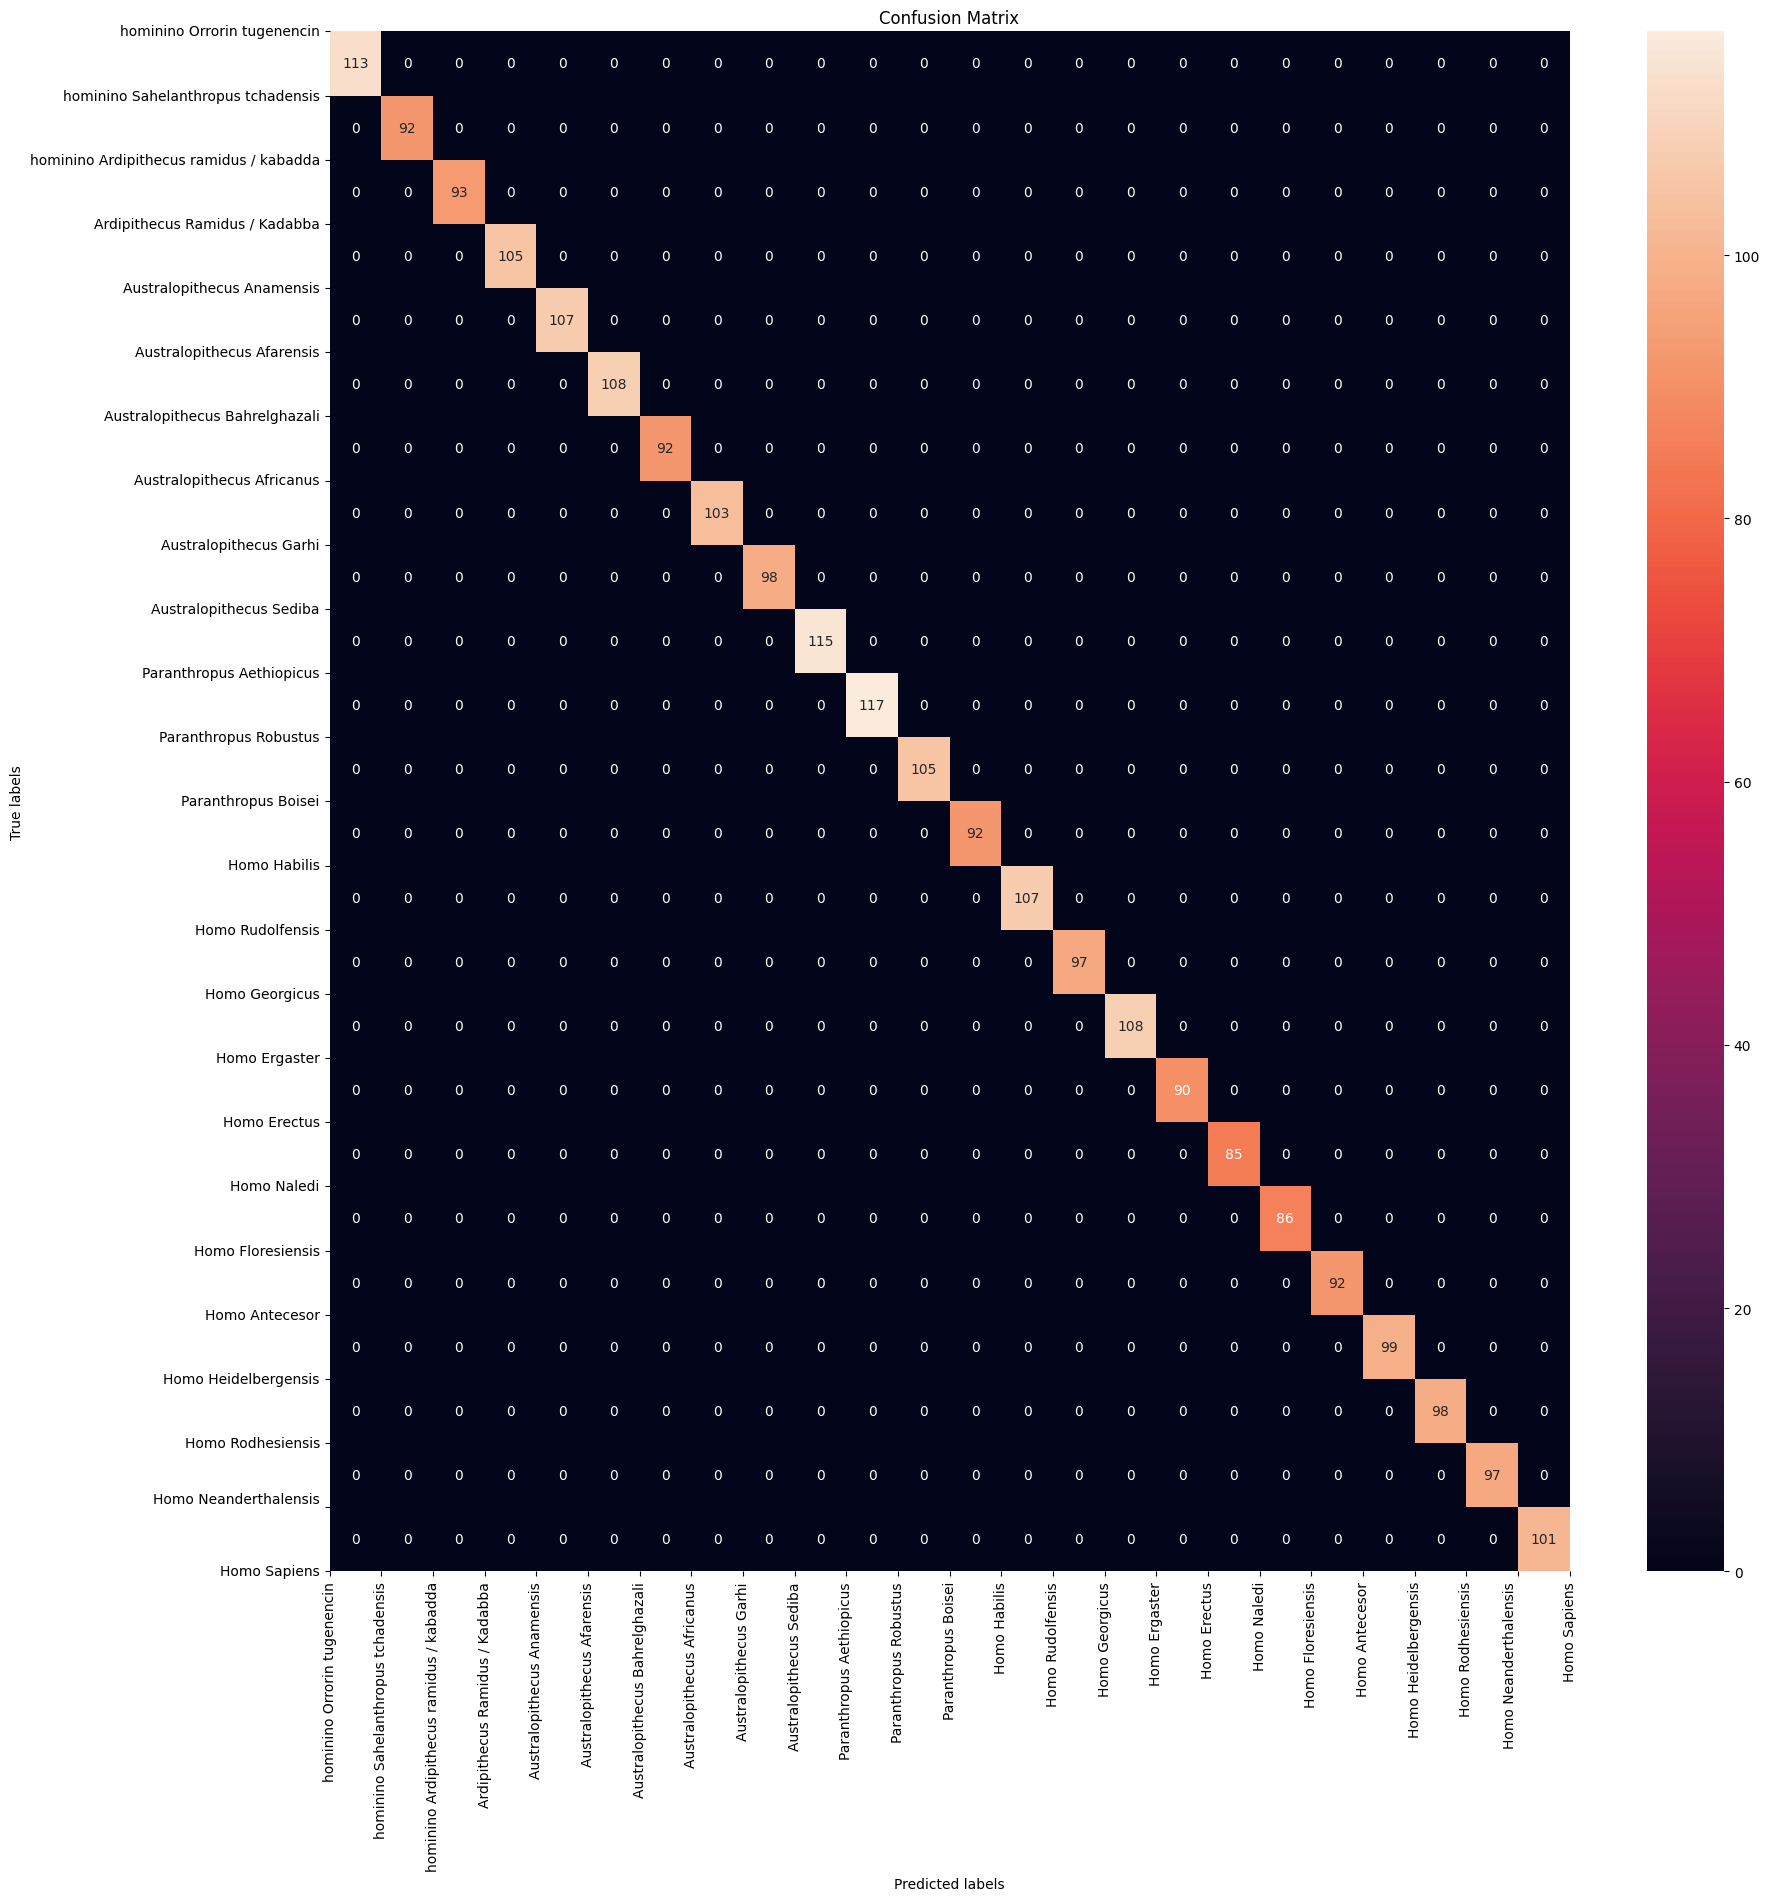

In [193]:
plt.figure(figsize=(20,20))
c_matrix_rf_2 = confusion_matrix(y1,y_pred_rf_pca_test1_3)
sns.heatmap(c_matrix_rf_2, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.xticks(rotation=90)
plt.xticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.yticks(rotation=360)
plt.yticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

## PRIMER MODELO DE LINEAR REGRESSION CON SCALER Y PCA

In [45]:


steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('reg', LogisticRegression())  
]


pipeline = Pipeline(steps)


param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [23,24,25],
    'reg__penalty': ['l1', 'l2'],
    'reg__C': np.logspace(-4,4,100),  
    'reg__solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'reg__max_iter': [100,200],
    'reg__class_weight': [None, 'balanced'],
    'reg__multi_class': ['ovr', 'multinomial']
}


random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

rs = random_search.fit(X, y) 

best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\teres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\teres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\teres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\teres\AppData

Best Score: 1.0
Best Parameters: {'scaler': StandardScaler(), 'reg__solver': 'lbfgs', 'reg__penalty': 'l2', 'reg__multi_class': 'ovr', 'reg__max_iter': 200, 'reg__class_weight': 'balanced', 'reg__C': 3274.5491628777318, 'pca__n_components': 25}


In [50]:
be_reglog1=rs.best_estimator_.fit(X,y)
y_pred_rl_pca_test1_1=be_reglog1.predict(X1)
y_pred_rl_pca_test1_pproba_1 = be_reglog1.predict_proba(X1)

In [51]:
precision3 = precision_score(y1, y_pred_rl_pca_test1_1,average='weighted')
recall3 = recall_score(y1, y_pred_rl_pca_test1_1,average='weighted')
f13 = f1_score(y1, y_pred_rl_pca_test1_1,average='weighted')
accuracy3=accuracy_score(y1,y_pred_rl_pca_test1_1)

roc_auc3= roc_auc_score(y1,y_pred_rl_pca_test1_pproba_1,average='weighted',multi_class='ovo')
print("Precision:", precision3)
print("Recall:", recall3)
print("F1-score:", f13)
print('ROC AUC score:', roc_auc3)
print('Accuracy',accuracy3)
print('-'*200)


Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC score: 1.0
Accuracy 1.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


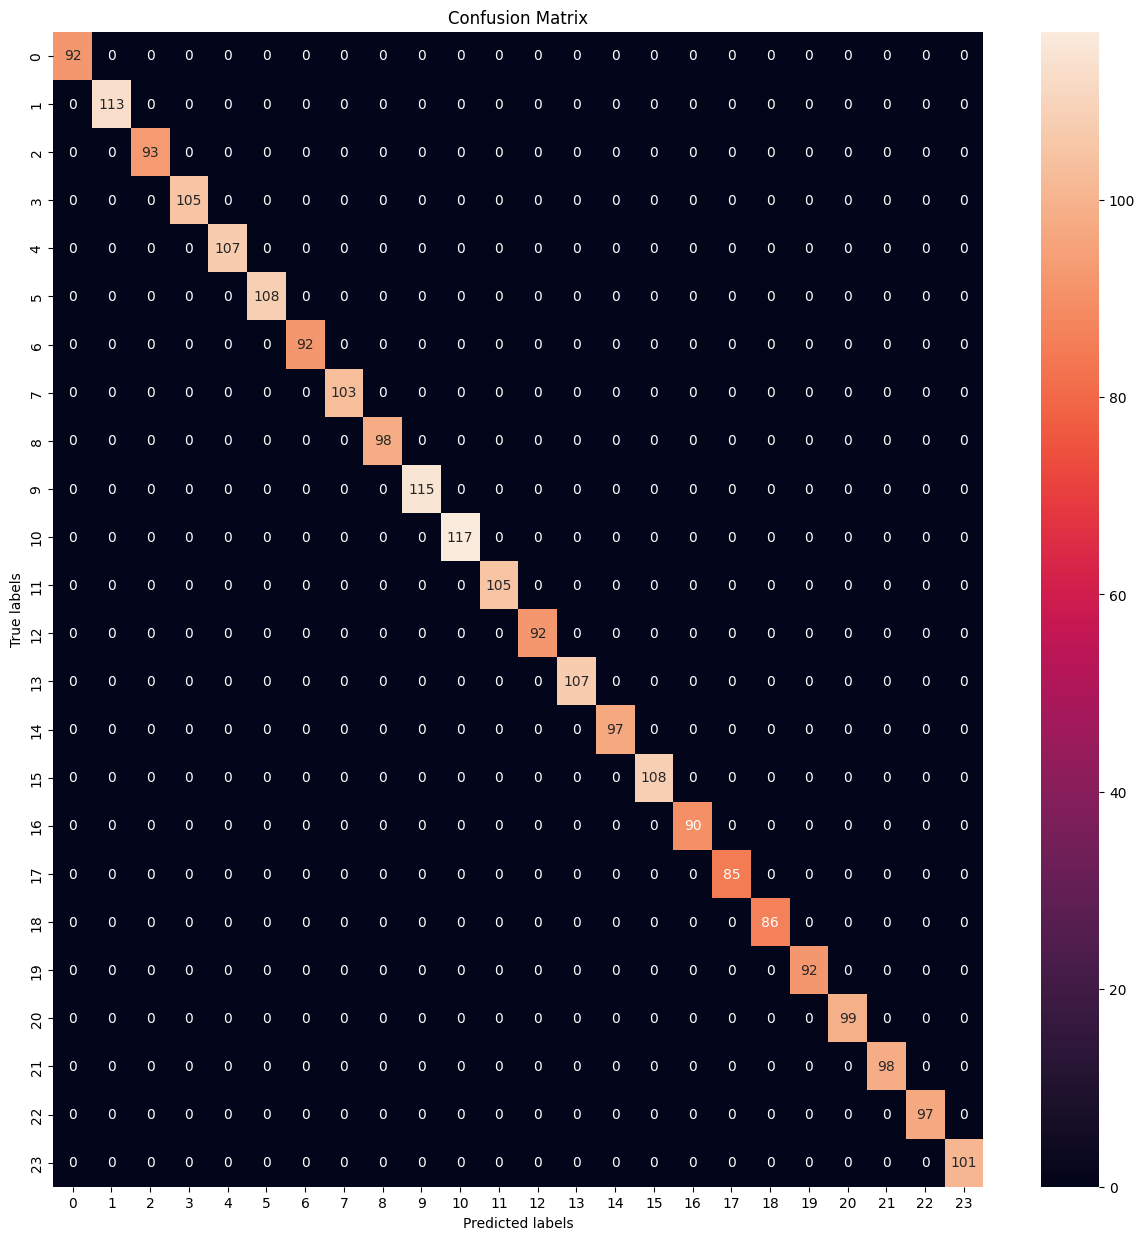

In [52]:
plt.figure(figsize=(15,15))
c_matrix2 = confusion_matrix(y1,y_pred_rl_pca_test1_1)
sns.heatmap(c_matrix2, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

In [56]:
import pickle

filename = '../models/rl1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be_reglog1, archivo_salida)

### MODELO DE KNN

In [198]:

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
]


pipeline = Pipeline(steps)


param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [23,24,25],
    'knn__n_neighbors': [ 10, 15, 20],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': [10, 20, 30, 40, 50],
    'knn__p': [1, 2]  
}


random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42,
    verbose=2
)


rs = random_search.fit(X, y)  


best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 1.0
Best Parameters: {'scaler': MinMaxScaler(), 'pca__n_components': 20, 'knn__weights': 'distance', 'knn__p': 2, 'knn__n_neighbors': 20, 'knn__leaf_size': 30, 'knn__algorithm': 'ball_tree'}


In [199]:
be_knn1=rs.best_estimator_.fit(X,y)
y_pred_knn_pca_test1_1=be_knn1.predict(X1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0
Accuracy 1.0


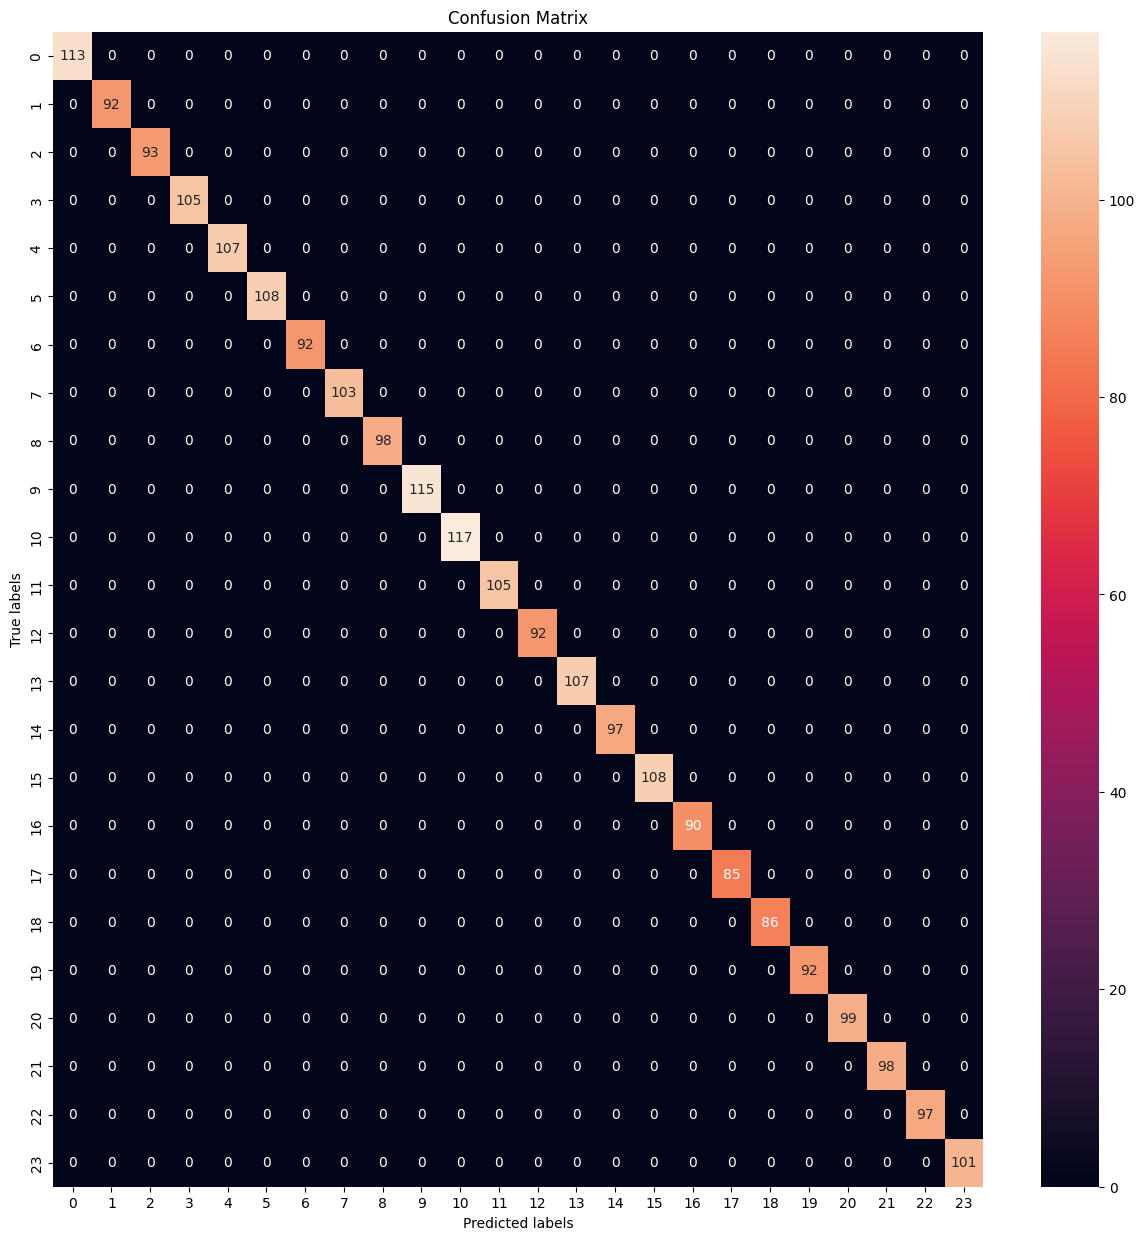

In [200]:
precision4 = precision_score(y1, y_pred_knn_pca_test1_1,average='weighted')
recall4 = recall_score(y1, y_pred_knn_pca_test1_1,average='weighted')
f14 = f1_score(y1, y_pred_knn_pca_test1_1,average='weighted')
accuracy4=accuracy_score(y1,y_pred_knn_pca_test1_1)

conf_matrix_knn = confusion_matrix(y1, y_pred_knn_pca_test1_1)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1-score:", f14)
print('Accuracy',accuracy4)

plt.figure(figsize=(15,15))
c_matrix3 = confusion_matrix(y1,y_pred_knn_pca_test1_1)
sns.heatmap(conf_matrix_knn, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();


In [47]:
import pickle

filename = './models/knn1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be_knn1, archivo_salida)

## MODELO CON SUPPORT VECTOR MACHINE

In [202]:

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', SVC())
]


pipeline = Pipeline(steps)

param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [23,24,25],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__C': np.logspace(-3, 3, 7),
    'svm__gamma': ['scale', 'auto']
}


random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42,
    verbose=2
)


rs = random_search.fit(X, y)  


best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 1.0
Best Parameters: {'svm__kernel': 'rbf', 'svm__gamma': 'scale', 'svm__C': 1000.0, 'scaler': StandardScaler(), 'pca__n_components': 20}


In [203]:
be_svm1=rs.best_estimator_.fit(X,y)
y_pred_svm_pca_test1_1=be_svm1.predict(X1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0
Accuracy 1.0


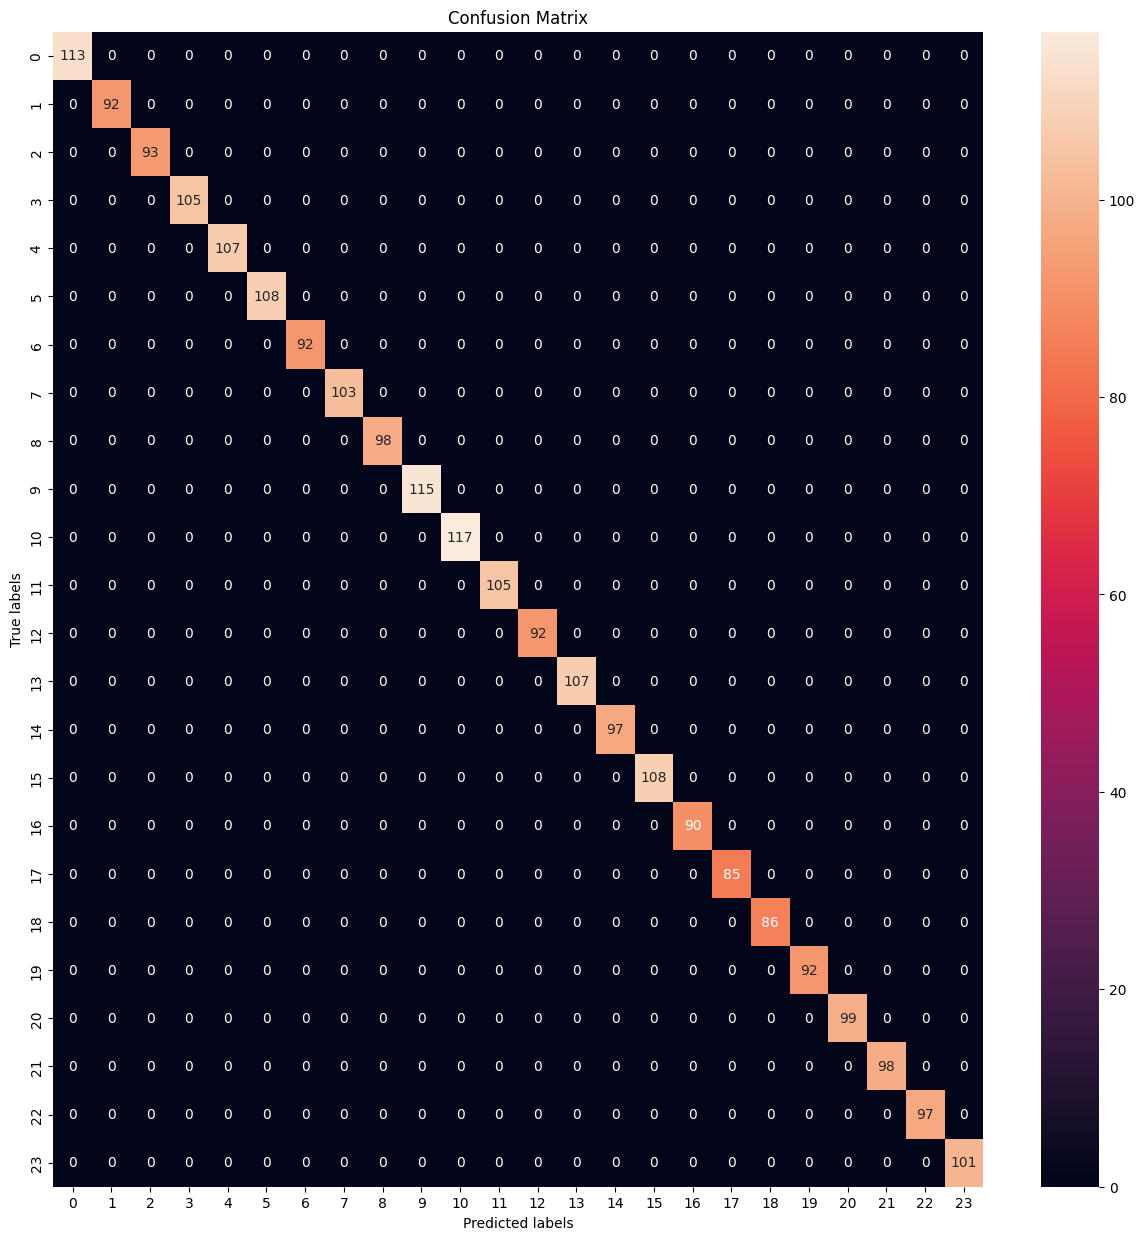

In [204]:
precision5 = precision_score(y1, y_pred_svm_pca_test1_1,average='weighted')
recall5 = recall_score(y1, y_pred_svm_pca_test1_1,average='weighted')
f15 = f1_score(y1, y_pred_svm_pca_test1_1,average='weighted')
accuracy5=accuracy_score(y1,y_pred_svm_pca_test1_1)

conf_matrix_svm = confusion_matrix(y1, y_pred_svm_pca_test1_1)
print("Precision:", precision5)
print("Recall:", recall5)
print("F1-score:", f15)
print('Accuracy',accuracy5)

plt.figure(figsize=(15,15))
c_matrix_svm = confusion_matrix(y1,y_pred_knn_pca_test1_1)
sns.heatmap(conf_matrix_svm, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();


In [62]:
import pickle

filename = './models/svm1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be_svm1, archivo_salida)

## MODELO CON GRADIENT BOOSTING CLASSIFIER

In [205]:

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('gb', GradientBoostingClassifier())
]


pipeline = Pipeline(steps)


param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [23,24,25],
    'gb__n_estimators': [100, 500, 1000],
    'gb__learning_rate': np.logspace(-3, 0, 10),
    'gb__max_depth': [3, 5, 7, 9],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4],
    'gb__subsample': [0.5, 0.7, 0.9, 1]
}


random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42,
    verbose=2
)


rs = random_search.fit(X, y)  


best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [206]:
be_gbc1=rs.best_estimator_.fit(X,y)
y_pred_gbc_pca_test1_1=be_gbc1.predict(X1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


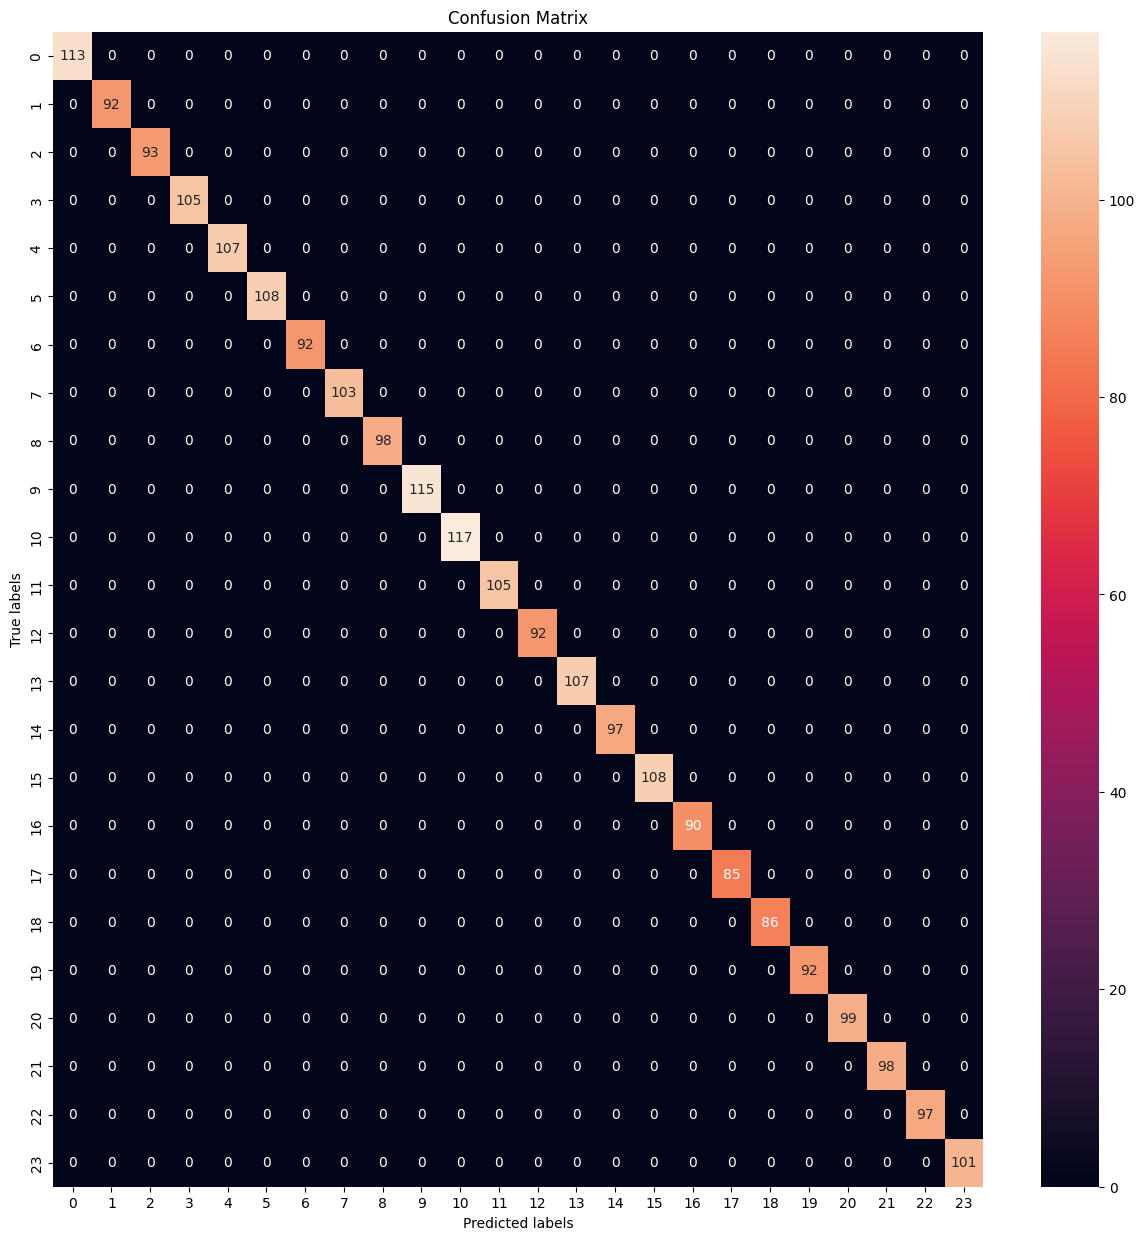

In [207]:
precision6 = precision_score(y1, y_pred_gbc_pca_test1_1,average='weighted')
recall6 = recall_score(y1, y_pred_gbc_pca_test1_1,average='weighted')
f16 = f1_score(y1, y_pred_gbc_pca_test1_1,average='weighted')

conf_matrix_gbc = confusion_matrix(y1, y_pred_gbc_pca_test1_1)
print("Precision:", precision6)
print("Recall:", recall6)
print("F1-score:", f16)

plt.figure(figsize=(15,15))
c_matrix_gbc = confusion_matrix(y1,y_pred_gbc_pca_test1_1)
sns.heatmap(conf_matrix_gbc, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

In [68]:
import pickle

filename = './models/gbc1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be_gbc1, archivo_salida)

In [129]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
]

pipeline = Pipeline(steps)

param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [21,20,22],
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [5,6,7,8],
    'classifier__max_leaf_nodes': [16,17,18]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=5, n_iter=30,n_jobs=-1,scoring='recall', random_state=42,verbose= 2)


rs=random_search.fit(X, y)


best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\teres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Score: nan
Best Parameters: {'scaler': None, 'pca__n_components': 10, 'classifier__n_estimators': 1000, 'classifier__max_leaf_nodes': 17, 'classifier__max_depth': 6}


In [130]:
be2=rs.best_estimator_.fit(X,y)

In [131]:
y_pred_rf_pca_test1_3=be2.predict(X1)
y_pred_rf_pca_test1_pproba_3 = be2.predict_proba(X1)
y_pred_rf_pca_train1_3=be2.predict(X)
y_pred_rf_pca_train1_pproba_3 = be2.predict_proba(X)

In [132]:
precision_3 = precision_score(y1, y_pred_rf_pca_test1_3,average='weighted')
recall_3 = recall_score(y1, y_pred_rf_pca_test1_3,average='weighted')
f1_3 = f1_score(y1, y_pred_rf_pca_test1_3,average='weighted')
accuracy_3=accuracy_score(y1,y_pred_rf_pca_test1_3)
roc_auc_3= roc_auc_score(y,y_pred_rf_pca_train1_pproba_3,average='weighted',multi_class='ovo')

In [133]:
precision_3 = precision_score(y1, y_pred_rf_pca_test1_3,average='weighted')
recall_3 = recall_score(y1, y_pred_rf_pca_test1_3,average='weighted')
f1_3 = f1_score(y1, y_pred_rf_pca_test1_3,average='weighted')
accuracy_3=accuracy_score(y1,y_pred_rf_pca_test1_3)
roc_auc_3= roc_auc_score(y,y_pred_rf_pca_train1_pproba_3,average='weighted',multi_class='ovo')
print('TEST')
print("Precision:", precision_3)
print("Recall:", recall_3)
print("F1-score:", f1_3)
print('ROC AUC score:', roc_auc_3)
print('Accuracy',accuracy_3)

TEST
Precision: 0.894591409576063
Recall: 0.8808333333333334
F1-score: 0.876885253943993
ROC AUC score: 0.9965396192605906
Accuracy 0.8808333333333334


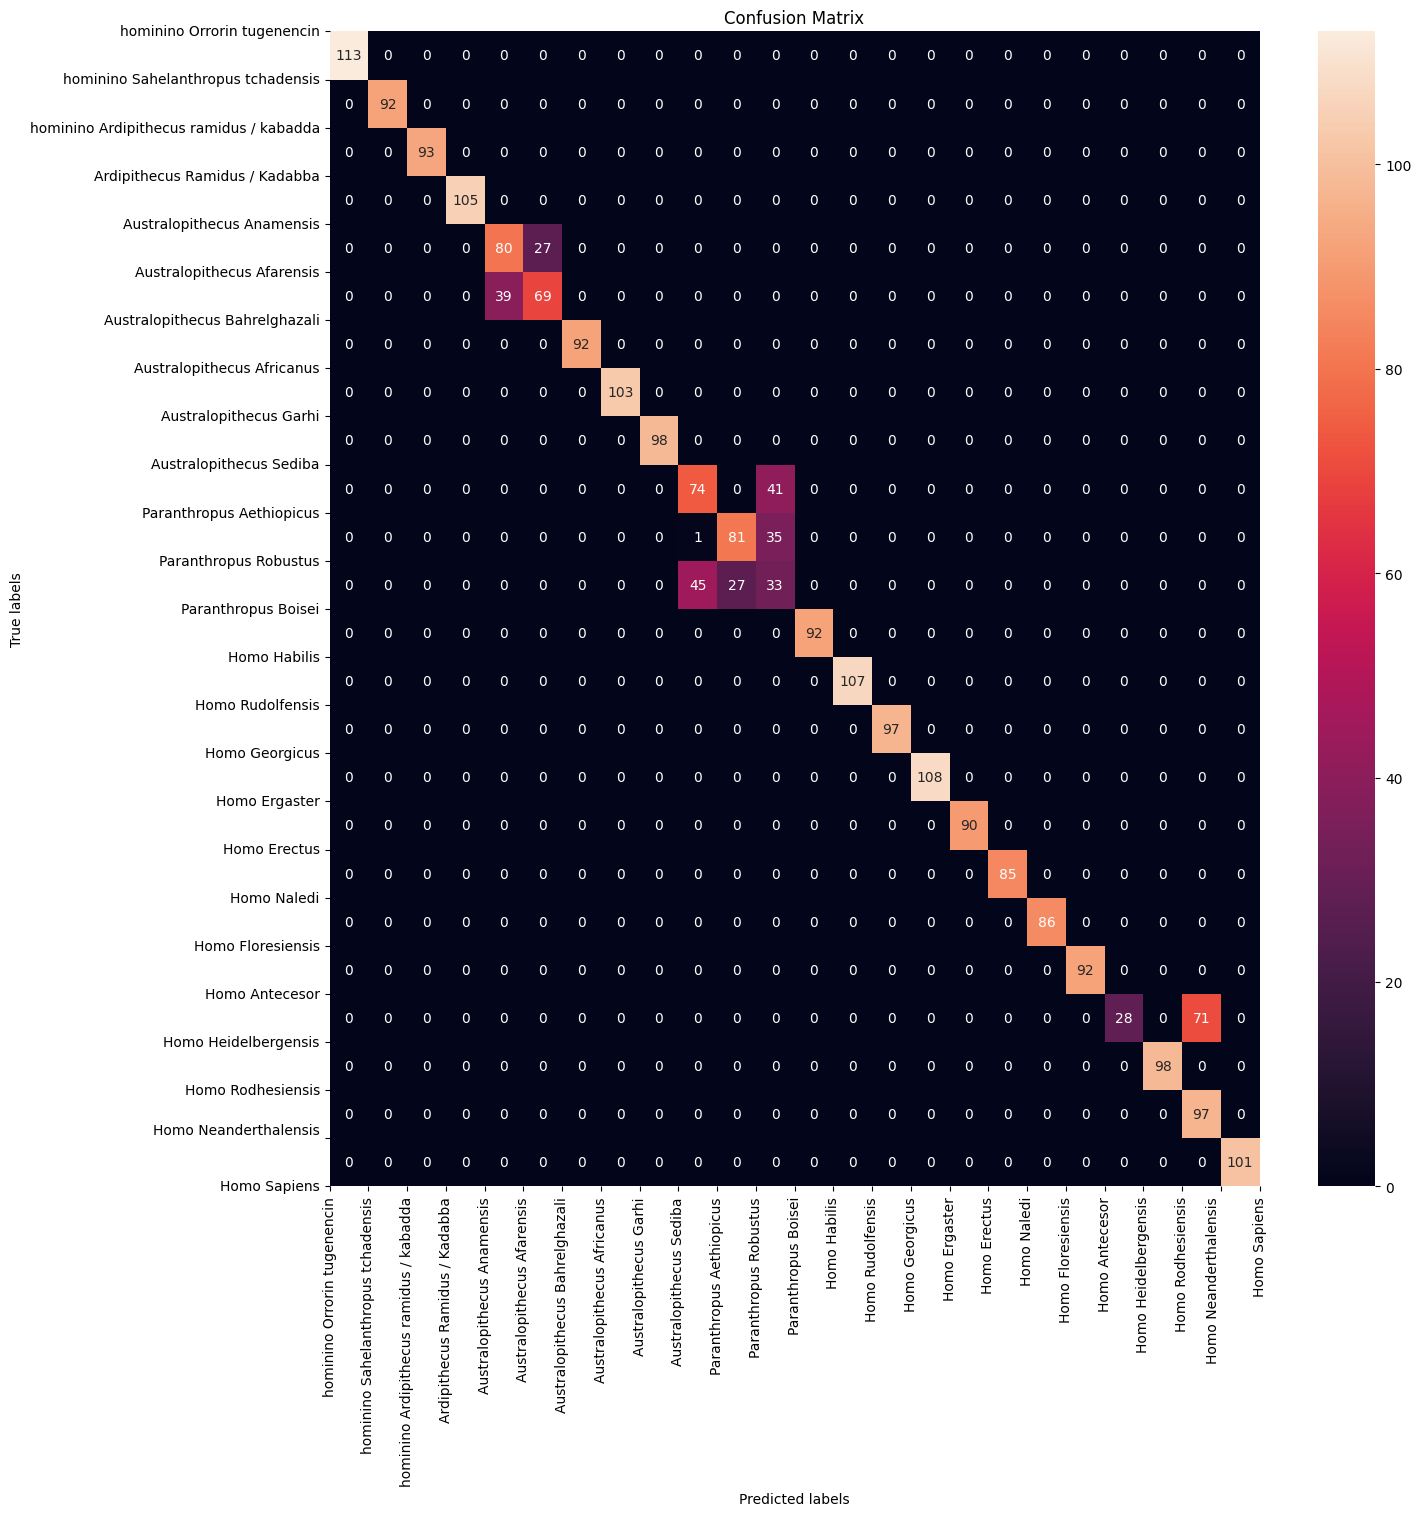

In [134]:
plt.figure(figsize=(15,15))
c_matrix_3 = confusion_matrix(y1,y_pred_rf_pca_test1_3)
sns.heatmap(c_matrix_3, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(rotation=90)
plt.xticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.yticks(rotation=360)
plt.yticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.title('Confusion Matrix')
plt.show();

In [99]:
scaler=StandardScaler()
df_escalados=pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
pca_pipe = make_pipeline( PCA(n_components=25))
pca_pipe.fit(df_escalados)

modelo_pca = pca_pipe['pca']
modelo_pca


PCA(n_components=10)

In [100]:
modelo_pca.components_

array([[ 0.3236364 , -0.3362637 , -0.34481571, -0.32596175, -0.3478381 ,
        -0.32007397, -0.34243847, -0.2619869 , -0.32355166, -0.20739253],
       [ 0.38728458, -0.40035348, -0.3117489 ,  0.13916005,  0.0127998 ,
         0.06738808,  0.16350414,  0.0388074 ,  0.27325435,  0.68232126],
       [ 0.14795384, -0.19567705, -0.19511403,  0.02095903,  0.14729654,
        -0.24922417,  0.15234993,  0.80798676,  0.04983245, -0.37278151],
       [ 0.34965751, -0.11549785, -0.03242793,  0.04994429,  0.43832049,
         0.6728369 , -0.1760292 ,  0.00799368, -0.39710807, -0.16515   ],
       [ 0.22378117, -0.1651561 ,  0.11011074,  0.76667759, -0.09834461,
        -0.16256226,  0.26215094, -0.31313283, -0.03057087, -0.34484566],
       [-0.07511065, -0.07056347,  0.2901023 ,  0.3747781 , -0.45399882,
         0.0985058 , -0.53215065,  0.39783558, -0.21530455,  0.24724358],
       [ 0.20432479,  0.28726358,  0.16043135, -0.04874768,  0.05011293,
        -0.29874659,  0.39608081,  0.09547387

In [101]:
modelo_pca.explained_variance_ratio_

array([0.64696511, 0.10936633, 0.07061369, 0.05193979, 0.03893322,
       0.03276516, 0.02716739, 0.01199985, 0.00587575, 0.00437372])

In [102]:
modelo_pca.explained_variance_ratio_.cumsum()

array([0.64696511, 0.75633144, 0.82694512, 0.87888491, 0.91781813,
       0.95058329, 0.97775068, 0.98975053, 0.99562628, 1.        ])

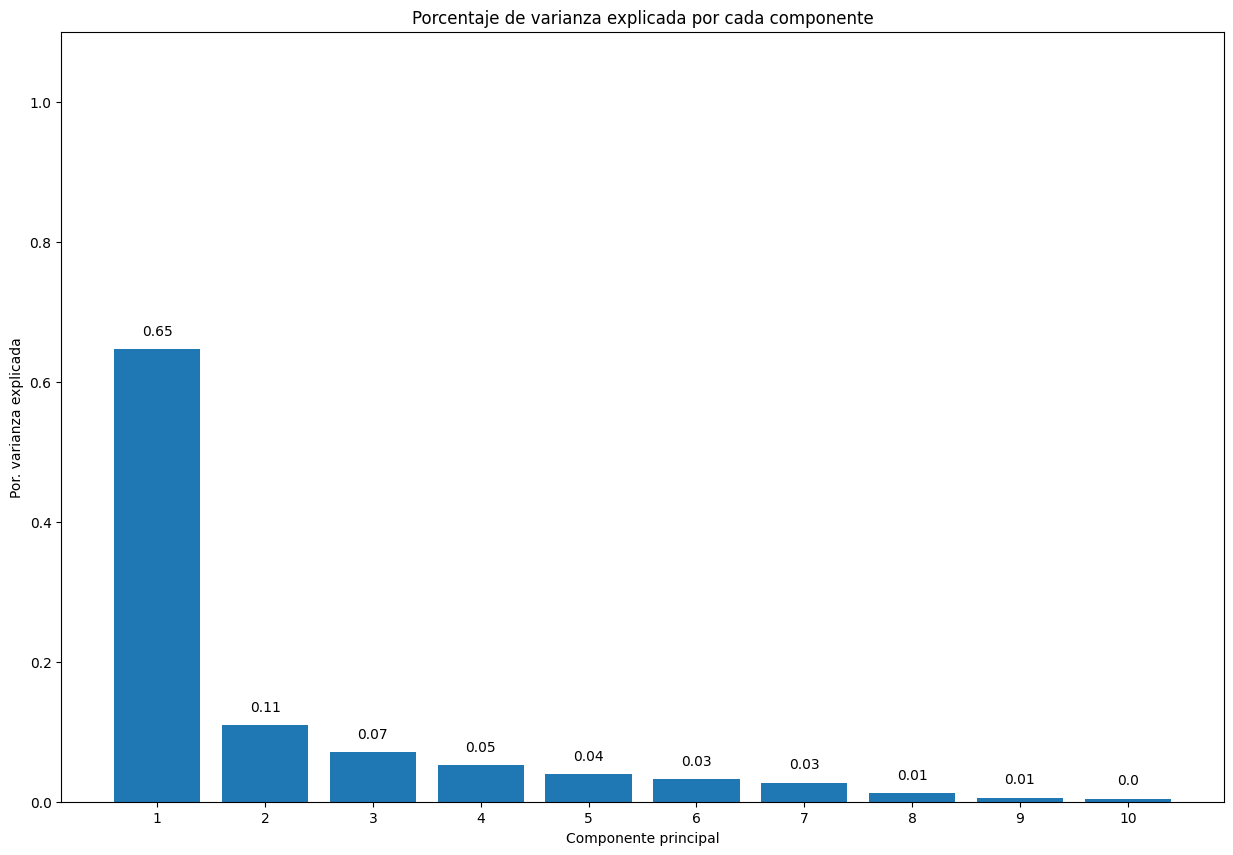

In [104]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X1.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

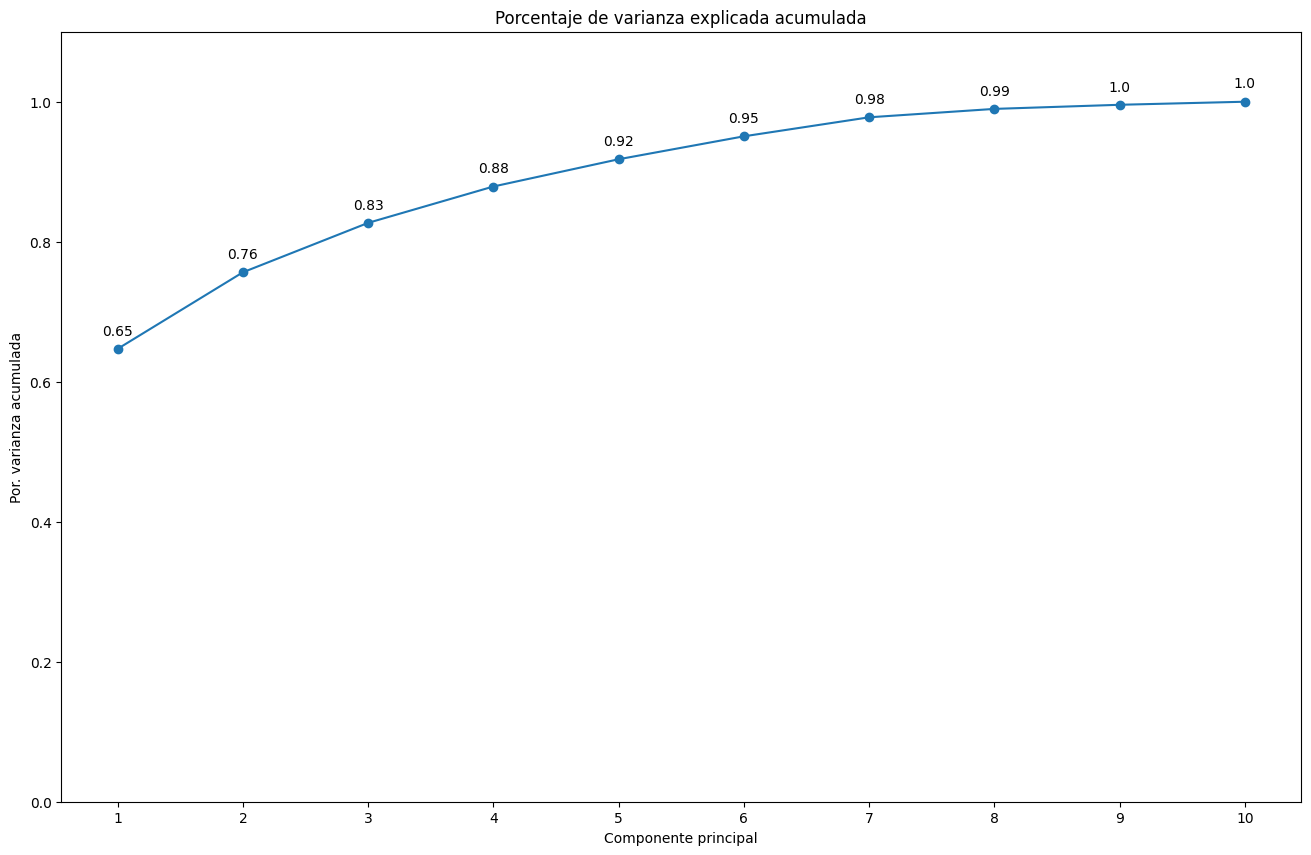

In [106]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
ax.plot(
    np.arange(len(X1.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X1.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [108]:
pca_features1 = modelo_pca.feature_names_in_

In [110]:
variance_explained = modelo_pca.explained_variance_ratio_

# Crear un DataFrame con la proporción de varianza explicada
df_variance_explained = pd.DataFrame({'Component': [f'PC{i+1}' for i in range(len(variance_explained))],
                                     'Explained Variance Ratio': variance_explained})

In [111]:
print(df_variance_explained)

  Component  Explained Variance Ratio
0       PC1                  0.646965
1       PC2                  0.109366
2       PC3                  0.070614
3       PC4                  0.051940
4       PC5                  0.038933
5       PC6                  0.032765
6       PC7                  0.027167
7       PC8                  0.012000
8       PC9                  0.005876
9      PC10                  0.004374


In [113]:
df_pca_importance = pd.DataFrame({'Feature': pca_features1,
                                  'Component': [f'PC{i+1}' for i in range(len(variance_explained))],
                                  'Explained Variance Ratio': variance_explained})

# Mostrar el DataFrame
print(df_pca_importance)

                      Feature Component  Explained Variance Ratio
0                        Time       PC1                  0.646965
1               Biped_encoded       PC2                  0.109366
2             Foramen_encoded       PC3                  0.070614
3  Torus_Supraorbital_encoded       PC4                  0.051940
4               Tecno_encoded       PC5                  0.038933
5                Diet_encoded       PC6                  0.032765
6             Anatomy_encoded       PC7                  0.027167
7            Location_encoded       PC8                  0.012000
8        Tooth_Enamel_encoded       PC9                  0.005876
9         Canine_Size_encoded      PC10                  0.004374
